# Linear Regression Project

Let's assume that I just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.


The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

**Let's get started**

## Imports

Importing numpy, pandas, matplotlib and seaborn, will import sklearn as needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data 

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar (don't worry, its all dummy data). Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [3]:
customers = pd.read_csv('Ecommerce Customers.csv')

check the head, and apply info() and describe() method to get some information about the data

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

**Let's explore the data**

In [11]:
sns.set_palette('viridis')
sns.set_style('whitegrid')

**Creating jointplot to compare the Time on Website and Yearly Amount Spent columns.**

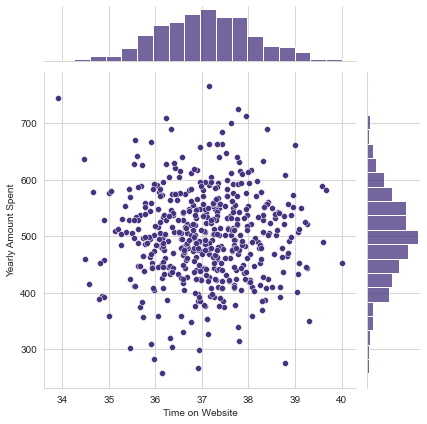

In [12]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

**Doing the same but on Time on App column**

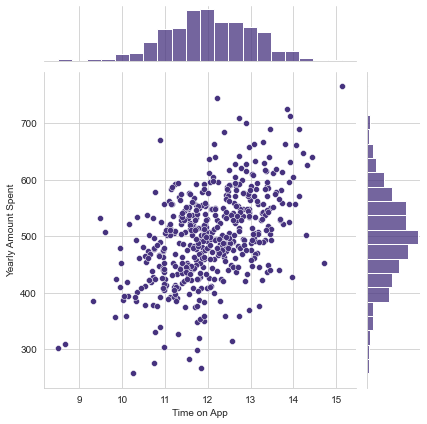

In [13]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

There seems to be some correlation between Yearly Amount Spent and Time on App columns

**Creating a hex plot to compare Time on App and Length of Membership**

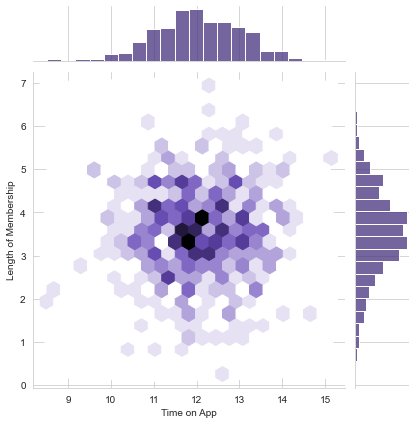

In [15]:
sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=customers)

**Using seaborn pairplot to see distribution of all numeric columns**

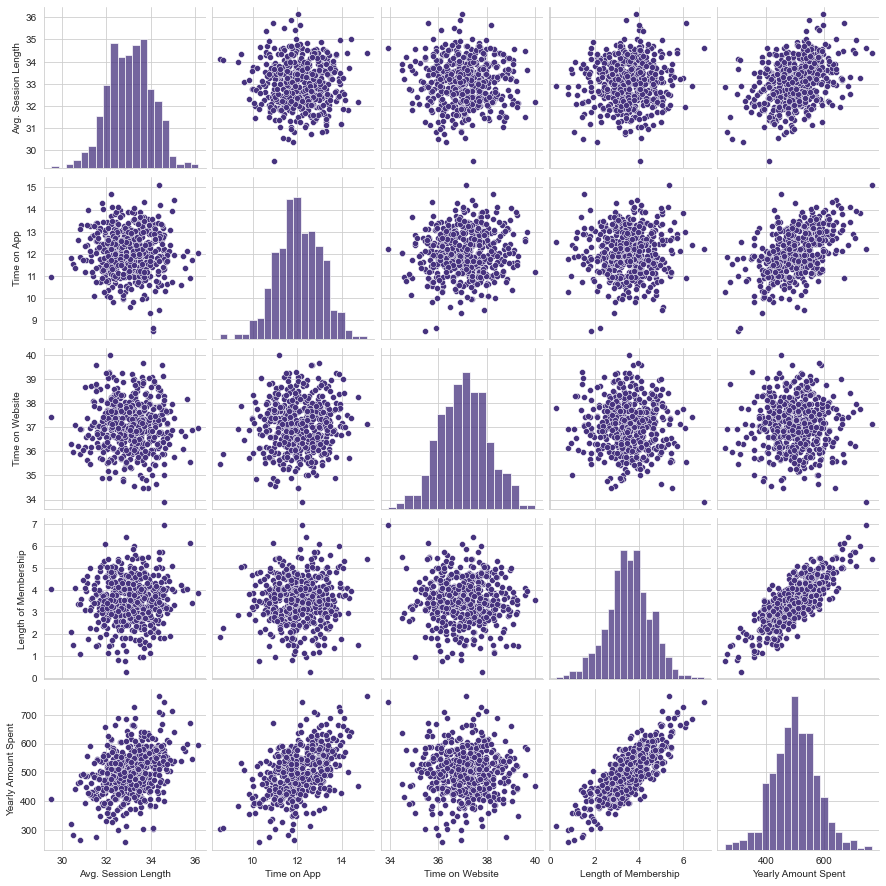

In [16]:
sns.pairplot(customers)

Based on this pairplot what looks to be most correlated feature of Yearly Amount Spent?

Ans: The Length of Membership looks to be most correlated as the Yearly Amount Spent is increasing with Length of Membership

**Now Creating a lmplot on Length of Membership vs Yearly Amount Spent**

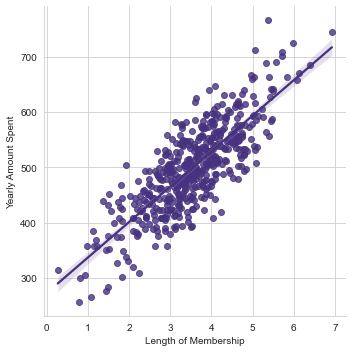

In [21]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

## Training and Testing

Now that we've explored the data a bit, let's split the data into training ans testing sets

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model with the training data

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

**Train/fit the data**

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

**Put out the coeficients**

In [35]:
coeficients = pd.DataFrame(lm.coef_, index=X_train.columns, columns=['Coeficients'])
coeficients

,Coeficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predict Test Values

Now that we have fit out model, let's try to predict test values

In [36]:
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

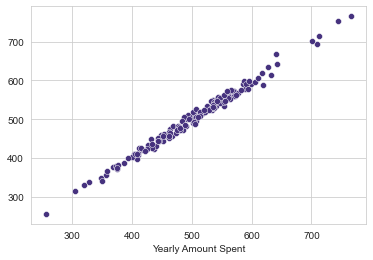

In [37]:
sns.scatterplot(x=y_test,y=predictions)

It looks like our model performed very good on the test data

## Evaluate the Model

Let's evaluate our model by finding Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [38]:
from sklearn import metrics

In [41]:
print('MAS:',metrics.mean_absolute_error(y_test, predictions))
print('MSE:',metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAS: 7.228148653430832
MSE: 79.81305165097444
RMSE: 8.933815066978633


## Residuals

Let's quickly explore the residuals

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

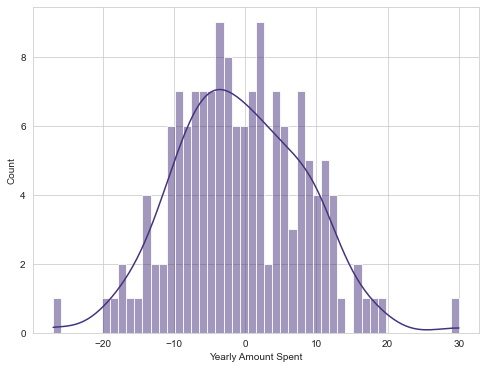

In [48]:
plt.figure(figsize=(8,6))
sns.histplot(x=(y_test-predictions), bins=50, kde=True)
sns.despine

## Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [49]:
coeficients

,Coeficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can we interpret the coeficients**

It looks like length of membership has the most impact on Yearly Amount Spent then Avg Session Length and then Time on App, Time on Website seems to have almost on impact on Yearly Amount Spent

**Do you think the company should focus more on their mobile app or on their website?**

Answers: Well, it really depends on the context, the company can focus on the app because it is already performing well or they can focus on their website in order to improve it so then it performs better than its current performance

## The End....